<a href="https://colab.research.google.com/github/DivyaSadhana/Prediction-of-Hospitalization-rate-based-on-Age-Vaccine-Manufacturer-Number-of-days-for-event-Onse/blob/main/Text_Analysis_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Establish connection between My Drive and Google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [124]:
# Import File

import pandas as pd
df = pd.read_excel(r'/content/gdrive/My Drive/2023_Master_Tracker.xlsx')
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,Coma,Computerised tomogram,Exposure to SARS-CoV-2,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
1,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
2,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,X-ray,NaN,NaN,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155172,2717538,2023-11-24,CO,NaN,NaN,NaN,U,NaN,breast cancer; This spontaneous case was repor...,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [ ]:
# Create datatable 'DataFrame'

In [125]:
  DataFrame = df[['VAERS_ID','AGE_YRS', 'VAX_MANU', 'NUMDAYS', 'SYMPTOM_TEXT']]
  DataFrame

,VAERS_ID,AGE_YRS,VAX_MANU,NUMDAYS,SYMPTOM_TEXT
0,2547730,53.00,JANSSEN,NaN,The adverse event is that the patient went int...
1,2547730,53.00,JANSSEN,NaN,The adverse event is that the patient went int...
2,2547730,53.00,JANSSEN,NaN,The adverse event is that the patient went int...
3,2547731,6.00,PFIZER\BIONTECH,0.0,Error: Incorrect Reconstitution-
4,2547732,38.00,MODERNA,0.0,Error: Patient Accidentally Stuck by Needle-
...,...,...,...,...,...
155172,2717538,NaN,MODERNA,NaN,breast cancer; This spontaneous case was repor...
155173,2717539,71.00,MODERNA,1.0,I could barely lift my arm/ could barely move;...
155174,2717539,71.00,MODERNA,1.0,I could barely lift my arm/ could barely move;...
155175,2624988,1.58,MODERNA,0.0,"Patient received monovalent vaccine on Friday,..."


# Exclude Duplicate rows from datatable

In [126]:
DataFrame = DataFrame.drop_duplicates(subset='VAERS_ID', keep=False)
DataFrame

,VAERS_ID,AGE_YRS,VAX_MANU,NUMDAYS,SYMPTOM_TEXT
3,2547731,6.0,PFIZER\BIONTECH,0.0,Error: Incorrect Reconstitution-
4,2547732,38.0,MODERNA,0.0,Error: Patient Accidentally Stuck by Needle-
5,2547733,63.0,MODERNA,0.0,Error: Dose in Series Given Too Early-
6,2547734,30.0,GLAXOSMITHKLINE BIOLOGICALS,0.0,Systemic: EYE TWITCHING-Medium
7,2547735,38.0,PFIZER\BIONTECH,0.0,"Systemic: Confusion-Mild, Systemic: Fainting /..."
...,...,...,...,...,...
155168,2717531,16.0,SANOFI PASTEUR,0.0,16 year old patient was given an extra dose of...
155169,2717532,30.0,SANOFI PASTEUR,0.0,she received Fluzone Quadrivalent and is curre...
155170,2717536,NaN,GLAXOSMITHKLINE BIOLOGICALS,NaN,arm is in a lot of pain; Swollen arm; This non...
155171,2717537,NaN,GLAXOSMITHKLINE BIOLOGICALS,NaN,ill; liver transplant; This serious case was r...


# Exclude details of the patients who experinced side effects with vaccine after 30 days of its administration

In [127]:
DataFrame = DataFrame[DataFrame['NUMDAYS'].astype(float) <= 31]
DataFrame

,VAERS_ID,AGE_YRS,VAX_MANU,NUMDAYS,SYMPTOM_TEXT
3,2547731,6.0,PFIZER\BIONTECH,0.0,Error: Incorrect Reconstitution-
4,2547732,38.0,MODERNA,0.0,Error: Patient Accidentally Stuck by Needle-
5,2547733,63.0,MODERNA,0.0,Error: Dose in Series Given Too Early-
6,2547734,30.0,GLAXOSMITHKLINE BIOLOGICALS,0.0,Systemic: EYE TWITCHING-Medium
7,2547735,38.0,PFIZER\BIONTECH,0.0,"Systemic: Confusion-Mild, Systemic: Fainting /..."
...,...,...,...,...,...
155133,2717506,NaN,PFIZER\BIONTECH,1.0,flu like symptoms; This is a spontaneous repor...
155148,2717516,NaN,PFIZER\BIONTECH,0.0,Arm itching for 9 days post vaccination; This ...
155152,2717519,NaN,PFIZER\BIONTECH,4.0,inside of both lips began to swell and have re...
155168,2717531,16.0,SANOFI PASTEUR,0.0,16 year old patient was given an extra dose of...


# Replace empty rows of 'Symptom' text with 'Not Applicable' to add text into null values

In [128]:
# Replace NA / NaN values with 'Not Applicable' in 'SYMPTOM_TEXT' column
DataFrame = DataFrame['SYMPTOM_TEXT'].fillna('Not Applicable')
DataFrame

3                          Error: Incorrect Reconstitution-
4              Error: Patient Accidentally Stuck by Needle-
5                    Error: Dose in Series Given Too Early-
6                            Systemic: EYE TWITCHING-Medium
7         Systemic: Confusion-Mild, Systemic: Fainting /...
                                ...                        
155133    flu like symptoms; This is a spontaneous repor...
155148    Arm itching for 9 days post vaccination; This ...
155152    inside of both lips began to swell and have re...
155168    16 year old patient was given an extra dose of...
155169    she received Fluzone Quadrivalent and is curre...
Name: SYMPTOM_TEXT, Length: 42903, dtype: object

In [129]:
# If df is a Series
DataFrame = DataFrame.to_frame()


# Print columns
print(DataFrame.columns)

Index(['SYMPTOM_TEXT'], dtype='object')


# Text Analysis

In [122]:
# Assuming DataFrame is your DataFrame and 'SYMPTOM_TEXT' is your column
keywords = ['hospital', 'hospitalization', 'hospitalized']

# Create a boolean Series
contains_keywords = DataFrame['SYMPTOM_TEXT'].str.contains('|'.join(keywords), case=False)

# Filter the DataFrame
DataFrame_filtered = DataFrame[contains_keywords]

# Print DataFrame
print(DataFrame_filtered)




                                             SYMPTOM_TEXT
229     SWELLING BELOW ELBOW (LOWER ONE); SWELLING IN ...
339     Patient presents to the ED with shortness of b...
343     Patient received 4th dose (2nd booster) and wi...
1037    Patient was given the Covid Vaccine Booster. S...
1210    Systemic: Allergic: Difficulty Breathing-Mediu...
...                                                   ...
154891  11/22/23 Employee has denied taking FLU shot f...
154995  My mother had a stroke within 48 hours of her ...
155044  NSTEMI/MI plus chest pains; Elevated systolic ...
155086  appears to be my vastus lateralls muscle. I co...
155101  he experienced rubbing of the inner and outer ...

[693 rows x 1 columns]


# Sentiment Analysis :- A new column 'sentiment' was created to asses the rate

In [111]:
from textblob import TextBlob

# Assuming DataFrame is your DataFrame and 'SYMPTOM_TEXT' is your column
keywords = ['hospital', 'hospitalization', 'hospitalized']

# Create a boolean Series
contains_keywords = DataFrame['SYMPTOM_TEXT'].str.contains('|'.join(keywords), case=False)

# Filter the DataFrame and create a copy
DataFrame_filtered = DataFrame[contains_keywords].copy()

# Define a function to calculate sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to your column
DataFrame_filtered['sentiment'] = DataFrame_filtered['SYMPTOM_TEXT'].apply(get_sentiment)

# Print DataFrame
print(DataFrame_filtered)


                                             SYMPTOM_TEXT  sentiment
229     SWELLING BELOW ELBOW (LOWER ONE); SWELLING IN ...   0.090341
339     Patient presents to the ED with shortness of b...   0.000000
343     Patient received 4th dose (2nd booster) and wi...   0.133333
1037    Patient was given the Covid Vaccine Booster. S...  -0.077778
1210    Systemic: Allergic: Difficulty Breathing-Mediu...   0.094444
...                                                   ...        ...
154891  11/22/23 Employee has denied taking FLU shot f...   0.083333
154995  My mother had a stroke within 48 hours of her ...   0.500000
155044  NSTEMI/MI plus chest pains; Elevated systolic ...   0.126952
155086  appears to be my vastus lateralls muscle. I co...   0.072973
155101  he experienced rubbing of the inner and outer ...   0.156614

[693 rows x 2 columns]


In [112]:
# Find the ID with the highest sentiment score
id_max_sentiment = DataFrame_filtered['sentiment'].idxmax()
print(f"The ID with the highest sentiment score is: {id_max_sentiment}")

# Find the ID with the lowest sentiment score
id_min_sentiment = DataFrame_filtered['sentiment'].idxmin()
print(f"The ID with the lowest sentiment score is: {id_min_sentiment}")

The ID with the highest sentiment score is: 144054
The ID with the lowest sentiment score is: 139456


# Extract Entities

In [ ]:
# nltk (Natural Language Toolkit) is a library in Python that provides tools for working with human language data (text).


# textblob is another Python library for processing textual data.
It is a simple API for NLP tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

#nltk.word_tokenize: This function is used to split a sentence or paragraph into individual words.

#nltk.pos_tag: This function is used to label each word in a sentence with its grammatical category (part of speech), such as noun, verb, adjective, etc.

#nltk.ne_chunk: This function is used to identify named entities (people, places, organizations, etc.) in a sentence.

#TextBlob: This is a class in the textblob library that provides a simple API for common text processing tasks.

# averaged_perceptron_tagger, maxent_ne_chunker, and words are resources used by nltk for part-of-speech tagging and named entity recognition.

In [83]:
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from textblob import TextBlob

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [85]:
import pandas as pd

# Load the data
df2 = pd.read_excel(r'/content/gdrive/My Drive/2023_Master_Tracker.xlsx')

# Drop duplicates
df2 = df2.drop_duplicates(subset='VAERS_ID', keep=False)

# Filter rows where 'NUMDAYS' is less than or equal to 31
df2 = df2[df2['NUMDAYS'].astype(float) <= 31]

# Fill NaN values in 'SYMPTOM_TEXT' with 'Not Applicable'
df2.loc[:, 'SYMPTOM_TEXT'] = df2['SYMPTOM_TEXT'].fillna('Not Applicable')

# Create 'Modified_Data' DataFrame with the columns 'AGE_YRS', 'VAX_MANU', and 'NUMDAYS'
Modified_Data = df2[['AGE_YRS', 'VAX_MANU', 'NUMDAYS', 'SYMPTOM_TEXT']].copy()

# Print DataFrame
print(Modified_Data)


        AGE_YRS                     VAX_MANU  NUMDAYS  \
3           6.0              PFIZER\BIONTECH      0.0   
4          38.0                      MODERNA      0.0   
5          63.0                      MODERNA      0.0   
6          30.0  GLAXOSMITHKLINE BIOLOGICALS      0.0   
7          38.0              PFIZER\BIONTECH      0.0   
...         ...                          ...      ...   
155133      NaN              PFIZER\BIONTECH      1.0   
155148      NaN              PFIZER\BIONTECH      0.0   
155152      NaN              PFIZER\BIONTECH      4.0   
155168     16.0               SANOFI PASTEUR      0.0   
155169     30.0               SANOFI PASTEUR      0.0   

                                             SYMPTOM_TEXT  
3                        Error: Incorrect Reconstitution-  
4            Error: Patient Accidentally Stuck by Needle-  
5                  Error: Dose in Series Given Too Early-  
6                          Systemic: EYE TWITCHING-Medium  
7       Systemi

In [87]:
# Define the keywords
keywords = ['hospital', 'hospitalization', 'hospitalized']

# Create a boolean Series
contains_keywords = Modified_Data['SYMPTOM_TEXT'].str.contains('|'.join(keywords), case=False)

# Filter the DataFrame
Modified_Data = Modified_Data[contains_keywords]

# Define a function to extract entities
def extract_entities(text):
    return [chunk for chunk in ne_chunk(pos_tag(word_tokenize(text))) if hasattr(chunk, 'label')]

# Apply the function to the 'SYMPTOM_TEXT' column
Modified_Data['entities'] = Modified_Data['SYMPTOM_TEXT'].apply(extract_entities)

# Print DataFrame
print(Modified_Data)

        AGE_YRS         VAX_MANU  NUMDAYS  \
229        66.0          JANSSEN     12.0   
339        72.0  PFIZER\BIONTECH     31.0   
343        38.0  PFIZER\BIONTECH     31.0   
1037       74.0  PFIZER\BIONTECH      0.0   
1210       65.0  PFIZER\BIONTECH      0.0   
...         ...              ...      ...   
154891     64.0    SEQIRUS, INC.      0.0   
154995     66.0  PFIZER\BIONTECH      2.0   
155044     72.0          MODERNA      0.0   
155086      NaN          MODERNA      2.0   
155101      NaN  PFIZER\BIONTECH      0.0   

                                             SYMPTOM_TEXT  \
229     SWELLING BELOW ELBOW (LOWER ONE); SWELLING IN ...   
339     Patient presents to the ED with shortness of b...   
343     Patient received 4th dose (2nd booster) and wi...   
1037    Patient was given the Covid Vaccine Booster. S...   
1210    Systemic: Allergic: Difficulty Breathing-Mediu...   
...                                                   ...   
154891  11/22/23 Employee has de

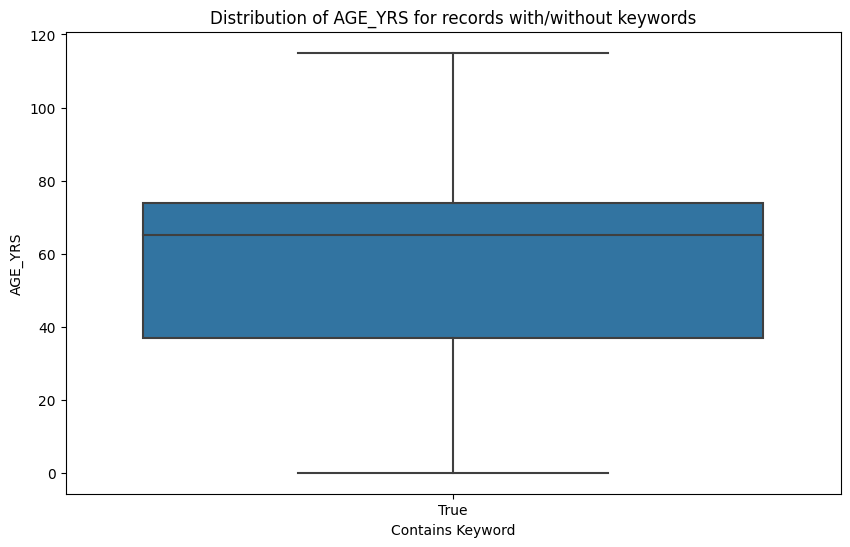

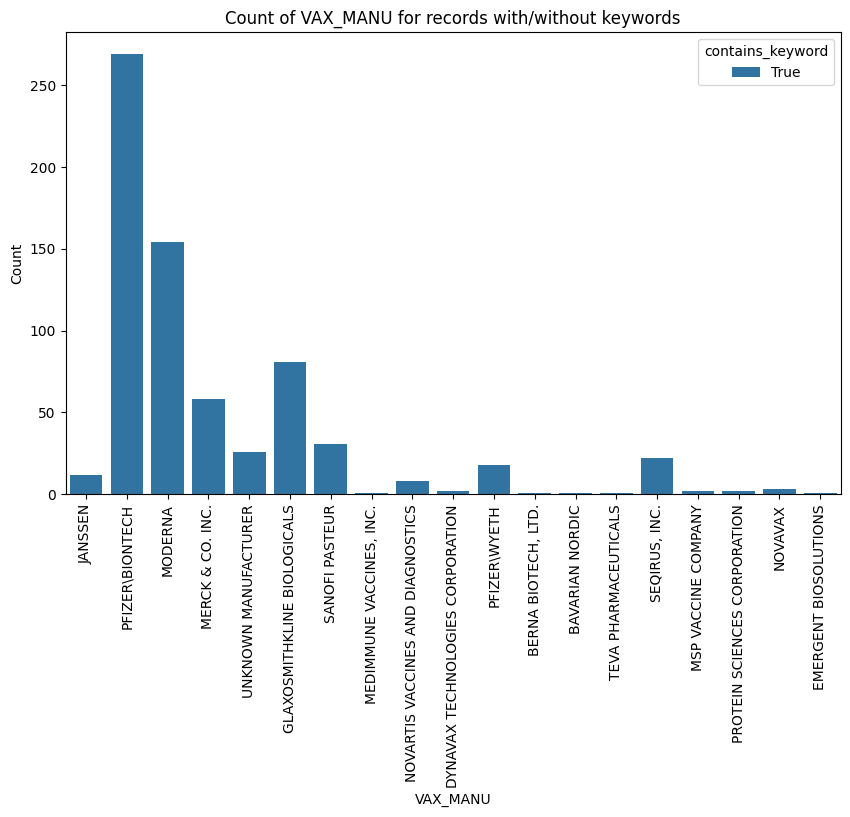

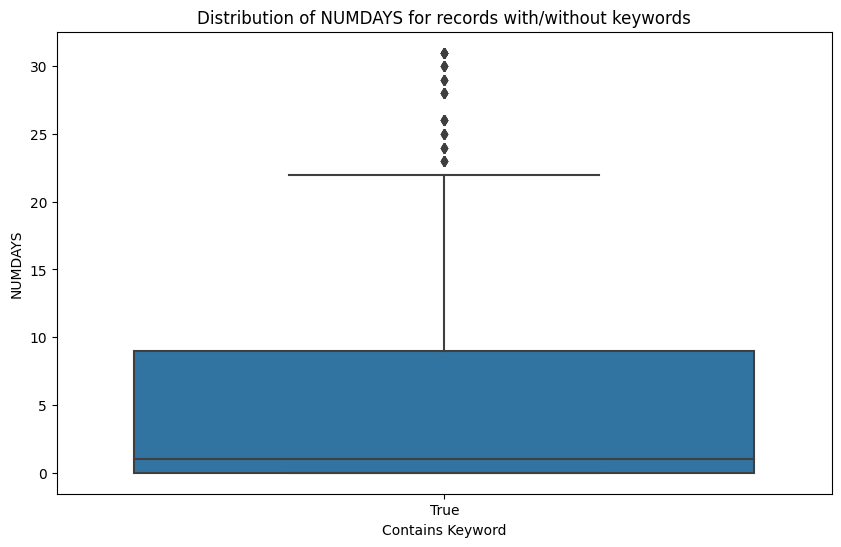

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new binary column 'contains_keyword'
Modified_Data['contains_keyword'] = contains_keywords

# Plot the distribution of 'AGE_YRS' for records with/without keywords
plt.figure(figsize=(10, 6))
sns.boxplot(x='contains_keyword', y='AGE_YRS', data=Modified_Data)
plt.xlabel('Contains Keyword')
plt.ylabel('AGE_YRS')
plt.title('Distribution of AGE_YRS for records with/without keywords')
plt.show()

# Plot the count of 'VAX_MANU' for records with/without keywords
plt.figure(figsize=(10, 6))
sns.countplot(x='VAX_MANU', hue='contains_keyword', data=Modified_Data)
plt.xlabel('VAX_MANU')
plt.ylabel('Count')
plt.title('Count of VAX_MANU for records with/without keywords')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of 'NUMDAYS' for records with/without keywords
plt.figure(figsize=(10, 6))
sns.boxplot(x='contains_keyword', y='NUMDAYS', data=Modified_Data)
plt.xlabel('Contains Keyword')
plt.ylabel('NUMDAYS')
plt.title('Distribution of NUMDAYS for records with/without keywords')
plt.show()


# Language Detection for text data 'Symptom_Text' column

In [134]:
# Load the data
df3 = pd.read_excel(r'/content/gdrive/My Drive/2023_Master_Tracker.xlsx')

# Drop duplicates
df3 = df3.drop_duplicates(subset='VAERS_ID', keep=False)

# Filter rows where 'NUMDAYS' is less than or equal to 31
df3 = df3[df3['NUMDAYS'].astype(float) <= 31]

# Fill NaN values in 'SYMPTOM_TEXT' with 'Not Applicable'
df3.loc[:, 'SYMPTOM_TEXT'] = df3['SYMPTOM_TEXT'].fillna('Not Applicable')

# Create 'Data' DataFrame with the columns 'AGE_YRS', 'VAX_MANU', 'NUMDAYS', and 'SYMPTOM_TEXT'
Data = df3[['AGE_YRS', 'VAX_MANU', 'NUMDAYS', 'SYMPTOM_TEXT']].copy()

In [136]:
import pandas as pd
!pip install langdetect
from langdetect import detect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=24d373346c058a1cb46c3537684cf5cc7ae31550e08f7a7e36ac98bbed724bc8
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
# Define a function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply the function to the 'SYMPTOM_TEXT' column
Data['language'] = Data['SYMPTOM_TEXT'].apply(detect_language)

# Print DataFrame
print(Data)